In [4]:
import pandas as pd
import seaborn as sns

C:\Users\leosimoe\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
sample_sub = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train_x = train.drop(['id','Class'],axis=1)
train_y = train['Class']

C:\Users\leosimoe\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

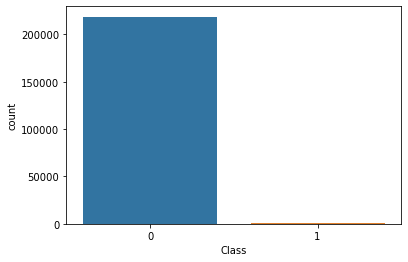

In [7]:
sns.countplot(train['Class'])

In [8]:
fraud = train[train.Class==1]
from sklearn.utils import resample
downsample = resample(train,
             replace=True,
             n_samples=469,
             )

print(downsample.shape)
downsample.groupby('Class')['Class'].count()

(469, 32)


Class
0    469
Name: Class, dtype: int64

In [10]:
balanced_train_down = pd.concat([downsample, fraud])


In [11]:
balanced_train_x = balanced_train_down.drop(['id','Class'], axis=1)
balanced_train_y = balanced_train_down.Class
test_x = test.drop(['id'], axis=1)

In [34]:
balanced_train_down_x = balanced_train_down.drop(['Class','id'],axis=1)

In [38]:
balanced_train_down_y=balanced_train_down.Class

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log = LogisticRegression(solver='liblinear',C=0.08858667904100823, penalty='l1').fit(balanced_train_down_x, balanced_train_down_y)
log_pred = log.predict(test_x)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(train_y, log_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89    218660
           1       0.01      0.65      0.01       469

    accuracy                           0.80    219129
   macro avg       0.50      0.73      0.45    219129
weighted avg       1.00      0.80      0.89    219129



In [45]:
test_sub = pd.DataFrame(log_pred, columns=['Class'])
test_sub['id'] = test.id
test_sub = test_sub[['id','Class']]
test_sub

,id,Class
0,219129,0
1,219130,0
2,219131,0
3,219132,0
4,219133,0
...,...,...
146082,365211,0
146083,365212,0
146084,365213,0
146085,365214,0


In [46]:
test_sub.to_csv('test_sub_log_liblinear_gs.csv', index=False)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import numpy as np


pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(balanced_train_x, balanced_train_y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\leosimoe\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.49572193 0.55864148 0.47967914 0.60558084 0.47647059 0.66949027
 0.47434862 0.67162931 0.50424394 0.68018546 0.64290591 0.67379679
 0.66954147 0.67804642 0.6855615  0.68549892 0.67380248 0.67269883
 0.67162931 0.66949596 0.6652122  0.66097394 0.66734555 0.66203777
 0.66841506 0.66310729 0.66947889 0.66203777 0.66947889 0.66310729
 0.66841506 0.66096826 0.66841506 0.66310729 0.66947889 0.66310729
 0.66840938 0.65989874 0.66734555 0.66310729 0.6077597  0.64502788
 0.63224485 0.64608033 0.62801798 0.64294004 0.65036978 0.62796678
 0.64609171 0.64289453 0.62472978 0.62156104 0.64824212 0.6450165
 0.62475253 0.63328024 0.63118102 0.6343782  0.63861076 0.63330299
 0.62901354 0.6301115  0.60350438 0.62903061 0.63434407 0.61303334
 0.62369439 0.62054841 0.64401525 0.63118102 0.61413699 0.58957788
 0.63759813 0.64077256 0.61832973 0.62905905 0.6407

In [31]:
best_clf.best_params_

{'classifier': LogisticRegression(C=0.08858667904100823, penalty='l1', solver='liblinear'),
 'classifier__C': 0.08858667904100823,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

In [26]:
LogisticRegression()

185397    0
189387    0
150459    0
132307    0
135625    0
         ..
218320    1
218396    1
218404    1
218937    1
219086    1
Name: Class, Length: 938, dtype: int64